# Model Training
1.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

Importing the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv(r'C:\Users\pulki\mlproject\notebook\data\raw.csv')

Showing Top 5 Records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_degree,lunch,test_preparation,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,completed,78,82,80
1,male,group C,some college,free,none,65,67,64
2,female,group A,associate's degree,standard,completed,88,90,89
3,male,group D,high school,free,none,52,55,53
4,female,group C,master's degree,standard,completed,90,92,91


Preparing X and Y variables

In [4]:
X = df.drop(columns=['math_score'],axis=1)

In [5]:
X.head()

,gender,race_ethnicity,parental_level_degree,lunch,test_preparation,reading_score,writing_score
0,female,group B,bachelor's degree,standard,completed,82,80
1,male,group C,some college,free,none,67,64
2,female,group A,associate's degree,standard,completed,90,89
3,male,group D,high school,free,none,55,53
4,female,group C,master's degree,standard,completed,92,91


In [6]:
print("Categories in 'gender' variable:",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_degree'].unique())

print("Categories in 'lunch' variable:",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:",end=" " )
print(df['test_preparation'].unique())

Categories in 'gender' variable: ['female' 'male']
Categories in 'race_ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "associate's degree" 'high school'
 "master's degree" 'some high school']
Categories in 'lunch' variable: ['standard' 'free']
Categories in 'test preparation course' variable: ['completed' 'none']


In [7]:
y = df['math_score']
y

0    78
1    65
2    88
3    52
4    90
5    60
6    85
7    70
8    75
9    68
Name: math_score, dtype: int64

In [8]:
# Create Column Transformer with 3 types of transformers
num_features= X.select_dtypes(exclude= 'object').columns
cat_features= X.select_dtypes(include= 'object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer= StandardScaler()
oh_transformer= OneHotEncoder()

preprocessor= ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [9]:
X= preprocessor.fit_transform(X)

In [11]:
X.shape

(10, 19)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 12)
X_test.shape, y_test.shape

((2, 19), (2,))

In [16]:
def evaluate_model(true, predicted):
    mae= mean_absolute_error(true, predicted)
    mse= mean_squared_error(true, predicted)
    rmse= np.sqrt(mse)
    r2_square= r2_score(true, predicted)

    return mae, rmse, r2_square

In [21]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list= []

for i in range(len(list(models))):
    model= list(models.values())[i]
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred= model.predict(X_train)
    y_test_pred= model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2= evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2= evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.1893
- Mean Absolute Error: 0.9416
- R2 Score: 0.9749


Lasso
Model performance for Training set
- Root Mean Squared Error: 1.1882
- Mean Absolute Error: 0.9437
- R2 Score: 0.9906
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.8664
- Mean Absolute Error: 0.6698
- R2 Score: 0.9867


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.7961
- Mean Absolute Error: 0.6646
- R2 Score: 0.9958
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5629
- Mean Absolute Error: 0.4087
- R2 Score: 0.9944


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 6.6671
- Mean Absolute Error: 5.2500
- R2 Score: 0.7047
-----------------------

# Results

In [22]:
pd.DataFrame(list(zip(model_list, r2_list)), columns= ['model_list', 'R2_score']).sort_values(by= ['R2_score'], ascending= False)

,model_list,R2_score
2,Ridge,0.994366
1,Lasso,0.986656
0,Linear Regression,0.974855
7,CatBoosting Regressor,0.906009
5,Random Forest Regressor,0.761724
8,AdaBoost Regressor,0.697778
3,K-Neighbors Regressor,0.271111
6,XGBRegressor,0.131157
4,Decision Tree,-0.111111


# Linear Regression

In [24]:
lin_model= LinearRegression(fit_intercept= True)
lin_model= lin_model.fit(X_train, y_train)
y_pred= lin_model.predict(X_test)
score= r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)


Accuracy of the model is 97.49


# Plot y_pred and y_test

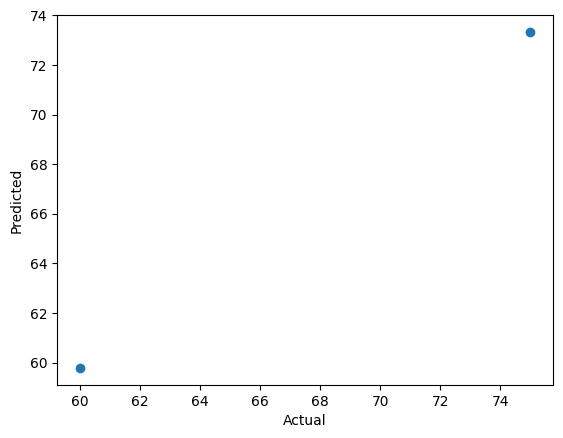

In [28]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

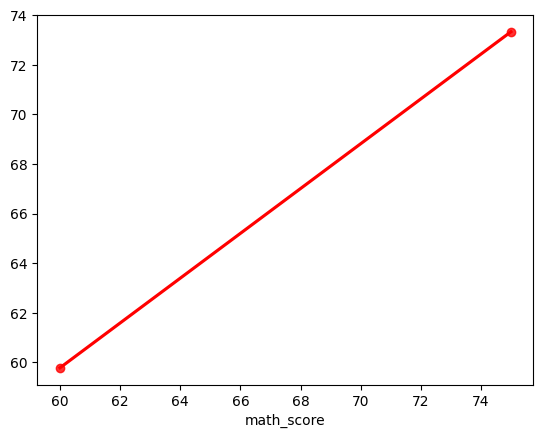

In [36]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')
plt.show()

Difference between Actual and Predicted Values

In [33]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
5,60,59.784910,0.215090
8,75,73.331909,1.668091
